## **Problem Statement**
XYZ Co's 2014-2018 sales data to identify key revenue and profit drivers across products, channels and regions ,uncover seasonal trends and outliers and align performance against budgets. Use these insights to optimize pricing, promotions and market expansion for sustainable growth and reduced concentration risk.

In [61]:
# Importing Libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [62]:
sheets = pd.read_excel(r'C:\Users\ADMIN\Downloads\Neha\Sales\Regional Sales Dataset.xlsx', sheet_name= None)

In [63]:
# Assign dataframes to each sheet

df_sales = sheets['Sales Orders']
df_customers = sheets['Customers']
df_products = sheets['Products']
df_regions = sheets['Regions']
df_state_reg = sheets['State Regions']
df_budgets = sheets['2017 Budgets']

In [64]:
df_sales.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [65]:
df_sales.shape

(64104, 12)

In [66]:
print("df_sales shape: " ,(df_sales.shape))
print("df_customers shape: " ,(df_customers.shape))
print("df_products shape: " ,(df_products.shape))
print("df_regions shape: " , (df_regions.shape))
print("df_state_reg shape: " , (df_state_reg.shape))
print("df_budgets shape: " , (df_budgets.shape))

df_sales shape:  (64104, 12)
df_customers shape:  (175, 2)
df_products shape:  (30, 2)
df_regions shape:  (994, 15)
df_state_reg shape:  (49, 3)
df_budgets shape:  (30, 2)


In [67]:
df_sales.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [68]:
df_customers.head(5)

,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd


In [69]:
df_products.head(5)

,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5


In [70]:
df_regions.head(5)

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago


In [71]:
df_state_reg.head(5)

,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West


In [72]:
# Converted Second Row as Header

new_header = df_state_reg.iloc[0]
df_state_reg.columns = new_header
df_state_reg = df_state_reg[1:].reset_index(drop= True)

df_state_reg.head(5)

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [73]:
df_budgets.head(5)

,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [74]:
df_sales.isnull().sum()

OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
dtype: int64

In [75]:
df_products.isnull().sum()

Index           0
Product Name    0
dtype: int64

In [76]:
df_customers.isnull().sum()

Customer Index    0
Customer Names    0
dtype: int64

In [77]:
df_regions.isnull().sum()

id               0
name             0
county           0
state_code       0
state            0
type             0
latitude         0
longitude        0
area_code        0
population       0
households       0
median_income    0
land_area        0
water_area       0
time_zone        0
dtype: int64

In [78]:
df_state_reg.isnull().sum()

0
State Code    0
State         0
Region        0
dtype: int64

In [79]:
df_budgets.isnull().sum()

Product Name    0
2017 Budgets    0
dtype: int64

#### **Data Cleaning and Wrangling**

In [80]:
# Merge with Customers

df = df_sales.merge(
    df_customers,
    how ='left',
    left_on = 'Customer Name Index',
    right_on = 'Customer Index'
)

In [81]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group


In [82]:
# Merge with Products

df = df.merge(
    df_products,
    how ='left',
    left_on = 'Product Description Index',
    right_on = 'Index'
)


In [83]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8


In [84]:
# Merge with Regions

df = df.merge(
    df_regions,
    how ='left',
    left_on = 'Delivery Region Index',
    right_on = 'id'
)

In [85]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York


In [86]:
# Merge with State Regions 

df = df.merge(
    df_state_reg[["State Code", "Region"]],
    how ='left',
    left_on = 'state_code',
    right_on = 'State Code'
)

In [87]:
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,GA,South
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast


In [88]:
# Merge with Budgets

df = df.merge(
    df_budgets,
    how ='left',
    on = 'Product Name'
)

In [89]:
# Customer Index
# Index
# id
# State Code

# Clean up redundant columns
cols_to_drop = ['Customer Index', 'Index', 'id', 'State Code']
df = df.drop(columns = cols_to_drop, errors= 'ignore')

df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


In [90]:
# Convert all columns to lower case for consistency and easier access

df.columns = df.columns.str.lower()

df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone', 'region',
       '2017 budgets'], dtype=object)

In [91]:
# Keep the important columns and delete the columns that we don't need

cols_to_keep = [
    'ordernumber',
    'orderdate', 
    'customer names', 
    'channel',
    'product name', 
    'order quantity', 
    'unit price',
    'line total', 
    'total unit cost',
    'state_code', 
    'county', 
    'state', 
    'region',
    'latitude',
    'longitude',
    '2017 budgets'
]   

In [92]:
df = df[cols_to_keep]

In [93]:
df.head(5)

,ordernumber,orderdate,customer names,channel,product name,order quantity,unit price,line total,total unit cost,state_code,county,state,region,latitude,longitude,2017 budgets
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [94]:
# Rename the columns

df = df.rename(columns={
    'ordernumber': 'order_number',
    'orderdate': 'order_date', 
    'customer names': 'customer_name', 
    'order quantity': 'order_quantity', 
    'unit price': 'unit_price',
    'line total': 'revenue', 
    'total unit cost': 'cost',
    'product name': 'product_name', 
    '2017 budgets': 'budget',
    'state_code': 'state',
    'state': 'state_name',
    'latitude': 'lat',
    'longitude': 'lon'
})

df.head(1)

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,cost,state,county,state_name,region,lat,lon,budget
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231


In [95]:
# Blank out budgets for non-2017 orders
df.loc[df['order_date'].dt.year != 2017,'budget'] = pd.NA

# Line total is revenue
df[['order_date', 'product_name', 'revenue', 'budget']].head(5)

,order_date,product_name,revenue,budget
0,2014-01-01,Product 27,14994.6,NaN
1,2014-01-01,Product 20,25868.7,NaN
2,2014-01-01,Product 26,5869.2,NaN
3,2014-01-01,Product 7,16368.1,NaN
4,2014-01-01,Product 8,18331.2,NaN


In [96]:
df[['order_date', 'product_name', 'revenue', 'budget']].tail(5)

,order_date,product_name,revenue,budget
64099,2018-02-28,Product 26,21788.4,NaN
64100,2018-02-28,Product 21,5185.8,NaN
64101,2018-02-28,Product 13,43483.0,NaN
64102,2018-02-28,Product 20,27717.9,NaN
64103,2018-02-28,Product 15,7986.4,NaN


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_number    64104 non-null  object        
 1   order_date      64104 non-null  datetime64[ns]
 2   customer_name   64104 non-null  object        
 3   channel         64104 non-null  object        
 4   product_name    64104 non-null  object        
 5   order_quantity  64104 non-null  int64         
 6   unit_price      64104 non-null  float64       
 7   revenue         64104 non-null  float64       
 8   cost            64104 non-null  float64       
 9   state           64104 non-null  object        
 10  county          64104 non-null  object        
 11  state_name      64104 non-null  object        
 12  region          64104 non-null  object        
 13  lat             64104 non-null  float64       
 14  lon             64104 non-null  float64       
 15  bu

In [98]:
# Filter the dataset to include only records from year 2017
df_2017 = df[df['order_date'].dt.year == 2017]

In [99]:
df.isnull().sum()

order_number          0
order_date            0
customer_name         0
channel               0
product_name          0
order_quantity        0
unit_price            0
revenue               0
cost                  0
state                 0
county                0
state_name            0
region                0
lat                   0
lon                   0
budget            48841
dtype: int64

In [100]:
df_2017.head(5)

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,cost,state,county,state_name,region,lat,lon,budget
46363,SO - 0002544,2017-01-01,NCS Group,Wholesale,Product 30,6,1239.5,7437.0,1028.785,NJ,Hudson County,New Jersey,Northeast,40.77955,-74.02375,1011609.684
46364,SO - 0006431,2017-01-01,Epic Group,Wholesale,Product 13,5,1829.1,9145.5,1207.206,CO,Mesa County,Colorado,West,39.06387,-108.55065,3720639.645
46365,SO - 0007491,2017-01-01,State Ltd,Wholesale,Product 15,9,2412.0,21708.0,1664.280,CA,Los Angeles County,California,West,33.96168,-118.35313,3299478.315
46366,SO - 0008741,2017-01-01,Fivebridge Ltd,Wholesale,Product 8,8,904.5,7236.0,750.735,IA,Dubuque County,Iowa,Midwest,42.50056,-90.66457,1085037.329
46367,SO - 0009295,2017-01-01,Tagfeed Ltd,Wholesale,Product 2,12,1112.2,13346.4,811.906,FL,Hernando County,Florida,South,28.47689,-82.52546,3050087.565


#### Feature Engineering

In [101]:
df['total_cost'] = df['order_quantity'] * df['cost']

In [102]:
df['profit'] = df['revenue'] - df['total_cost']

df['profit_margin_pct'] = df['profit'] / df['revenue']*100

df.head(5)

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,cost,state,county,state_name,region,lat,lon,budget,total_cost,profit,profit_margin_pct
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0


#### **EDA**

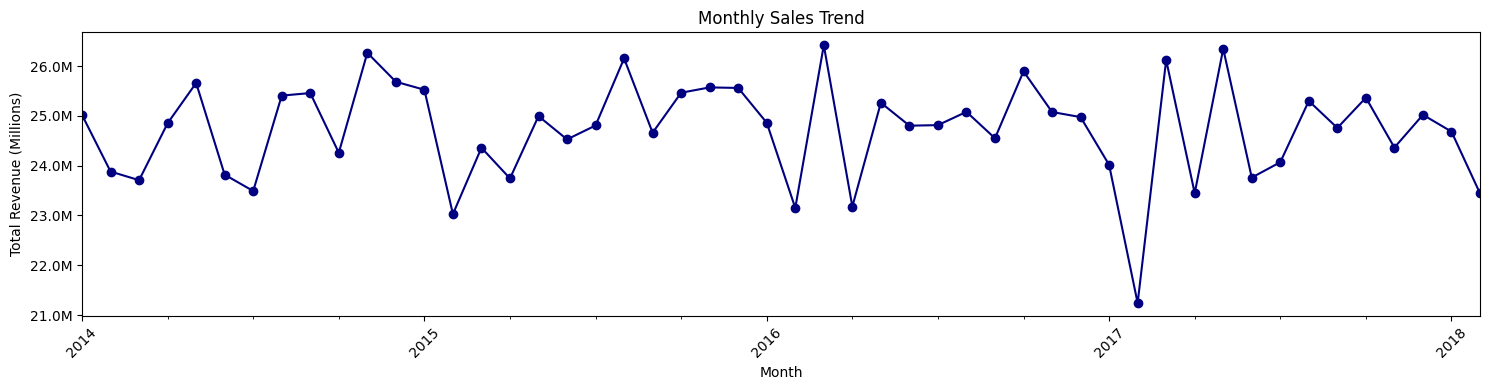

In [103]:
# Monthly Sales Trend

df['order_month'] = df['order_date'].dt.to_period('M')

monthly_sales = df.groupby('order_month')['revenue'].sum()

plt.figure(figsize=(15,4))

monthly_sales.plot(marker='o' , color='navy')

from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

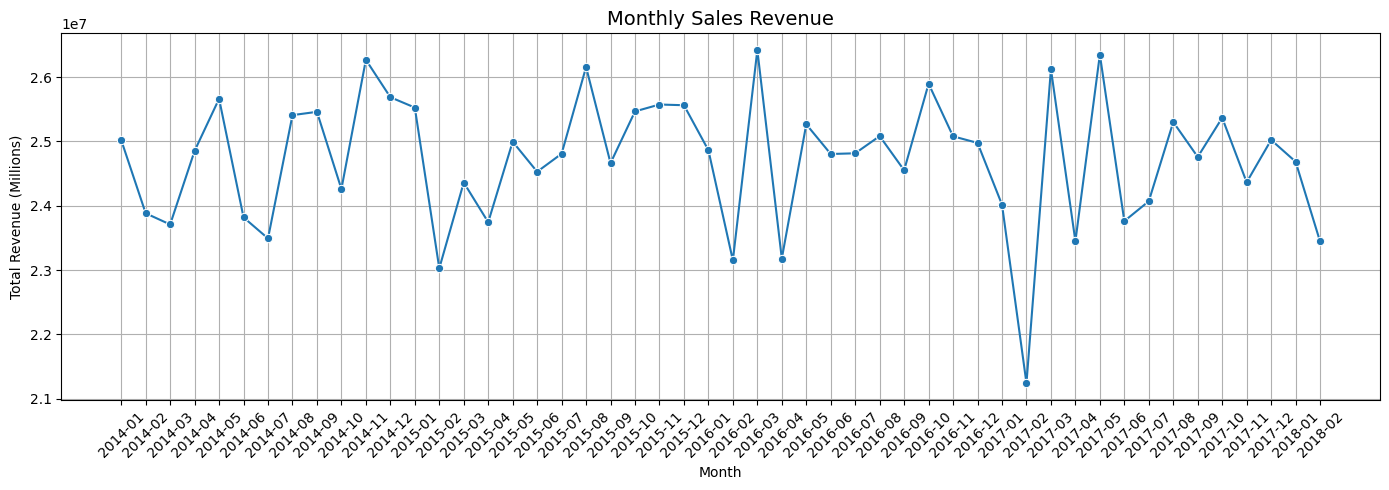

In [104]:


# Ensure order_date is in datetime format
df['order_date'] = pd.to_datetime(df['order_date'])

# Extract Year-Month for grouping
df['year_month'] = df['order_date'].dt.to_period('M')

# Aggregate revenue by year_month
monthly_sales = df.groupby('year_month')['revenue'].sum().reset_index()

# Convert year_month back to string for plotting
monthly_sales['year_month'] = monthly_sales['year_month'].astype(str)

# Create the line chart
plt.figure(figsize=(14, 5))
sns.lineplot(data= monthly_sales, x= 'year_month', y='revenue', marker='o')
plt.title('Monthly Sales Revenue', fontsize= 14)
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [105]:
# Ensure order_date is in datetime format
df['order_date'] = pd.to_datetime(df['order_date'])

# Extract Year-Month
df['order_month'] = df['order_date'].dt.to_period('M')

# Filter out the unwanted months
df_new = df[~((df['order_month'].dt.year == 2018) & (df['order_date'].dt.month.isin([1,2])))]


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14456\3803491612.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['order_date'] = pd.to_datetime(df_new['order_date'])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14456\3803491612.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['month'] = df_new['order_date'].dt.month
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14456\3803491612.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

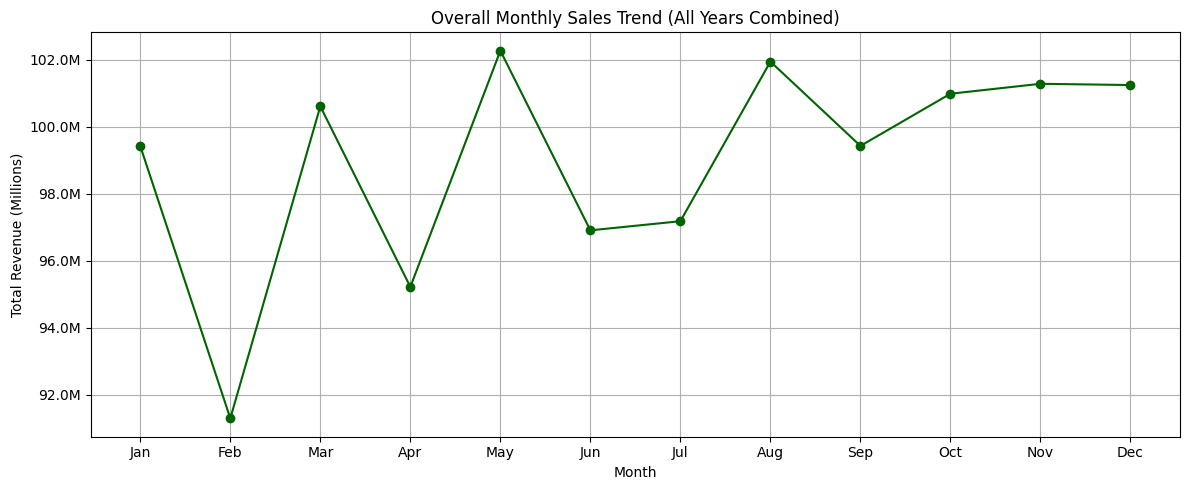

In [106]:
# Make sure order_date is in datetime format
df_new['order_date'] = pd.to_datetime(df_new['order_date'])

# Extract calendar month (number and name)
df_new['month'] = df_new['order_date'].dt.month
df_new['month_name'] = df_new['order_date'].dt.strftime('%b')  # e.g., Jan, Feb

# Group by month number to maintain proper order
monthly_seasonality = df_new.groupby('month')['revenue'].sum().reset_index()

# Add month names for labeling
monthly_seasonality['month_name'] = monthly_seasonality['month'].apply(
    lambda x: pd.to_datetime(str(x), format='%m').strftime('%b')
)

# Sort to ensure Jan–Dec order
monthly_seasonality = monthly_seasonality.sort_values('month')

# Plot
plt.figure(figsize=(12, 5))
plt.plot(monthly_seasonality['month_name'], monthly_seasonality['revenue'], marker='o', color='darkgreen')

# Format y-axis in millions
formatter = FuncFormatter(lambda x, pos: f'{x / 1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

# Title and labels
plt.title('Overall Monthly Sales Trend (All Years Combined)')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14456\1912924082.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_products, x='product_name', y='revenue', palette='Blues_d')


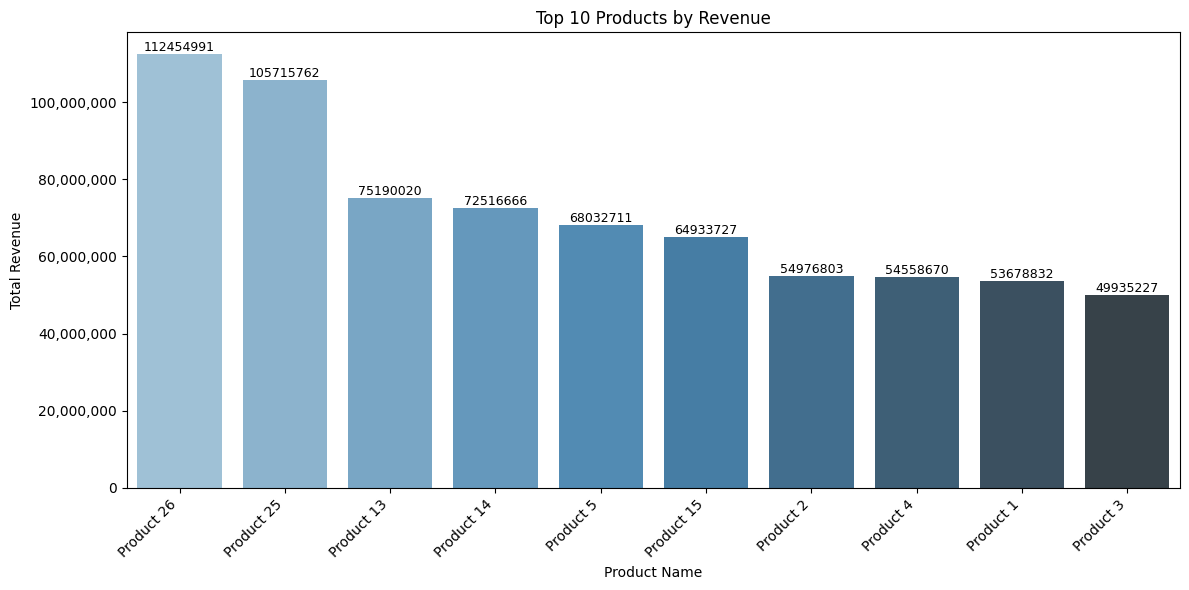

In [107]:
# Top 10 Products by Revenue

# Step 1: Prepare the data
top_products = (
    df_new.groupby('product_name')['revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Step 2: Plot using Seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_products, x='product_name', y='revenue', palette='Blues_d')

# Step 3: Add value labels on top of bars
for i in ax.containers:
    ax.bar_label(i, fmt='%.0f', label_type='edge', fontsize=9)

# Step 4: Customize the plot
plt.title('Top 10 Products by Revenue')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')

# Optional: Format y-axis with commas
from matplotlib.ticker import FuncFormatter
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x:,.0f}'))

plt.tight_layout()
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14456\855474394.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=bottom_products, x='product_name', y='revenue', palette='Reds_r')


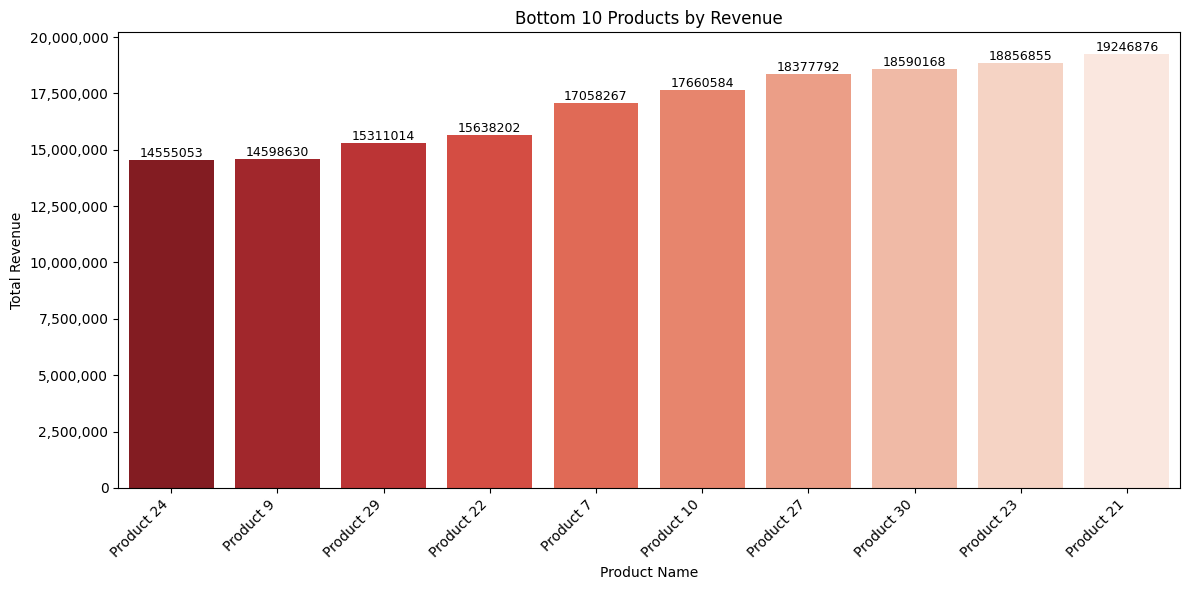

In [108]:
# Bottom 10 Products by Revenue

# Step 1: Prepare the data
bottom_products = (
    df.groupby('product_name')['revenue']
    .sum()
    .sort_values(ascending=True)
    .head(10)
    .reset_index()
)

# Step 2: Plot using Seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=bottom_products, x='product_name', y='revenue', palette='Reds_r')

# Step 3: Add labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=9)

# Step 4: Customize the plot
plt.title('Bottom 10 Products by Revenue')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')

# Format y-axis with commas
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x:,.0f}'))

plt.tight_layout()
plt.show()


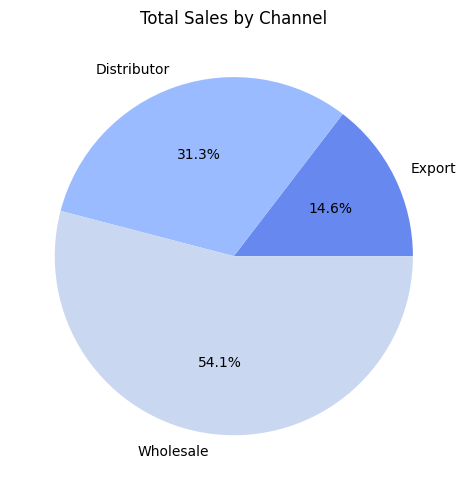

In [109]:
# Sales by channel

chan_sales = df_new.groupby('channel')['revenue'].sum().sort_values(ascending=True)

plt.figure(figsize=(5,5))

plt.pie(
    chan_sales.values,
    labels=chan_sales.index,
    autopct='%1.1f%%',
    colors=sns.color_palette('coolwarm')
)
plt.title("Total Sales by Channel")
plt.tight_layout()
plt.show()

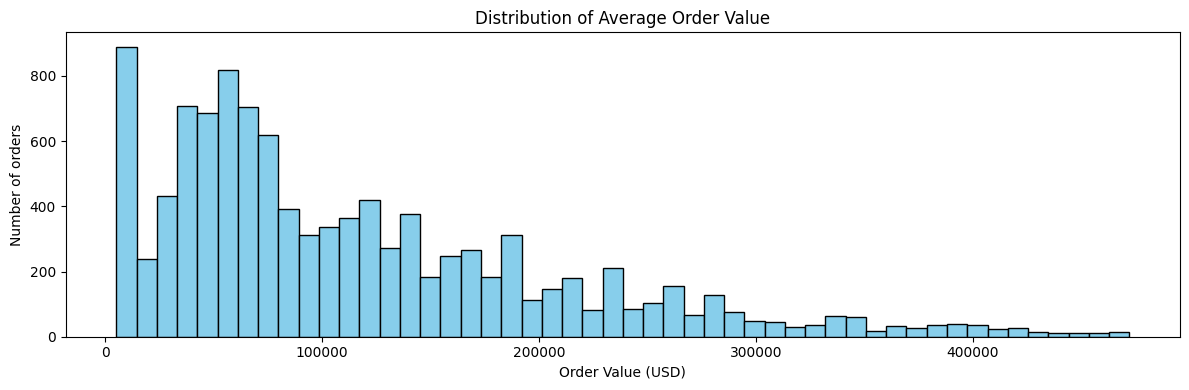

In [110]:
# Average Order Value (AOV) Distribution

aov = df.groupby('order_number')['revenue'].sum()

plt.figure(figsize=(12,4))

plt.hist(
    aov,
    bins=50,
    color='skyblue',
    edgecolor='black'
)

plt.title('Distribution of Average Order Value')
plt.xlabel('Order Value (USD)')
plt.ylabel('Number of orders')
plt.tight_layout()
plt.show()

In [111]:
# Unit Price Distribution per Product
# Top 10 states by Revenue and Order Count
# Average Profit Margin by Channel
# Top and Bottom 10 Customers by Revenue
# Customer Segmentation: Revenue vs Profit Margin
# Correlation Heatmap 

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14456\1806322810.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=filtered_df, x='product_name', y='unit_price', palette='Set2')


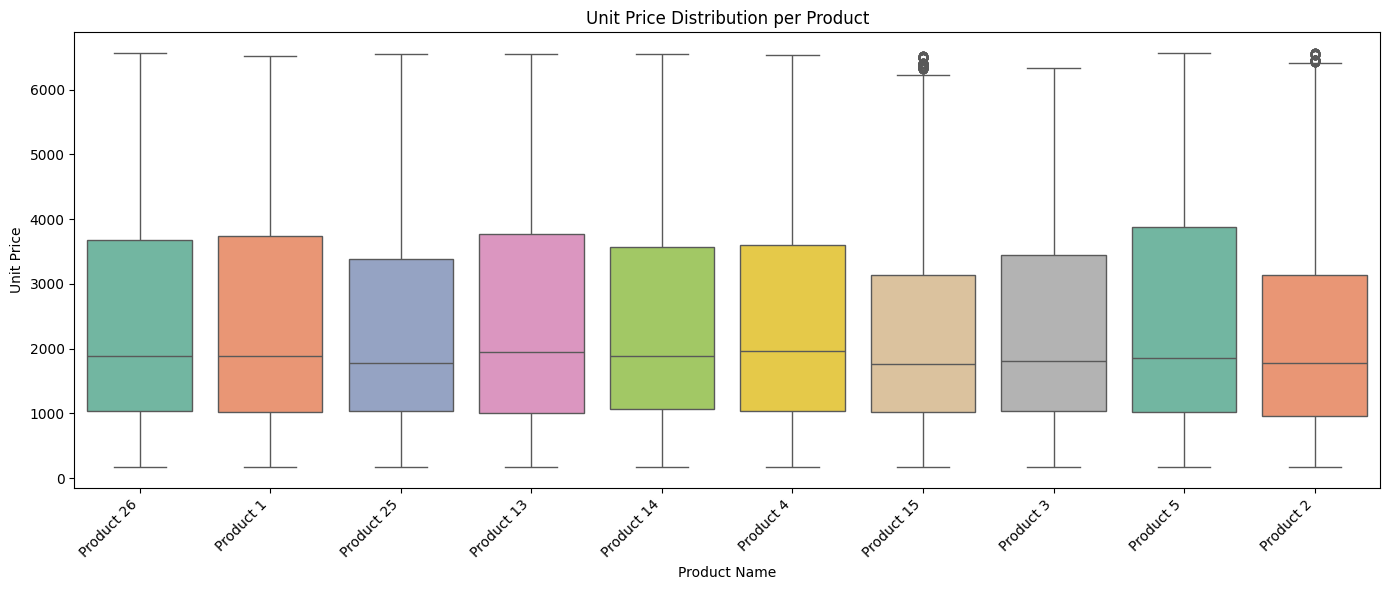

In [112]:
# Unit Price Distribution of top 10 Products


# Optional: limit to top 10 products for readability
top_products = df['product_name'].value_counts().head(10).index
filtered_df = df[df['product_name'].isin(top_products)]

plt.figure(figsize=(14, 6))
ax = sns.boxplot(data=filtered_df, x='product_name', y='unit_price', palette='Set2')

plt.title('Unit Price Distribution per Product')
plt.xlabel('Product Name')
plt.ylabel('Unit Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


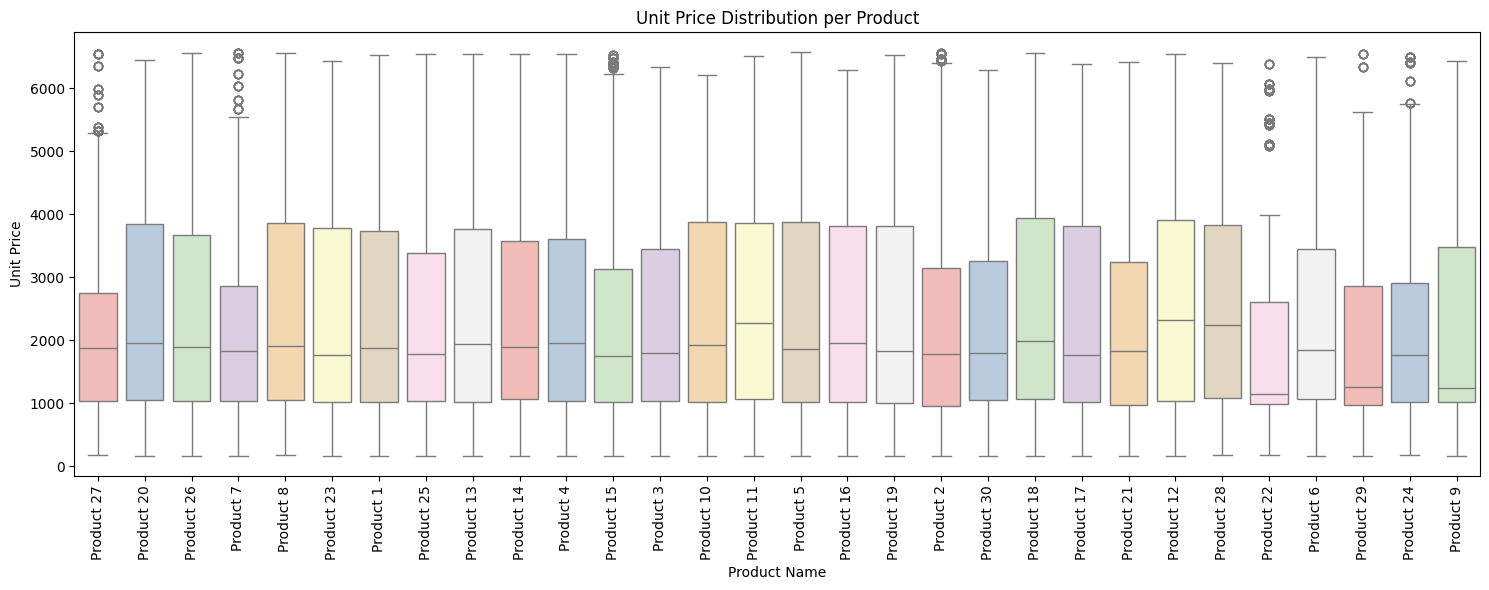

In [113]:
# Unit Price Distribution per Product

# Plot for all products
plt.figure(figsize=(max(14, len(df['product_name'].unique()) * 0.5), 6))  # Dynamic width
ax = sns.boxplot(
    data=df,
    x='product_name',
    y='unit_price',
    hue='product_name',
    palette='Pastel1',
    legend=False
)

# Format
plt.title('Unit Price Distribution per Product')
plt.xlabel('Product Name')
plt.ylabel('Unit Price')
plt.xticks(rotation=90, ha='center')  # Rotate to prevent overlap
plt.tight_layout()
plt.show()



C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14456\2015768567.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


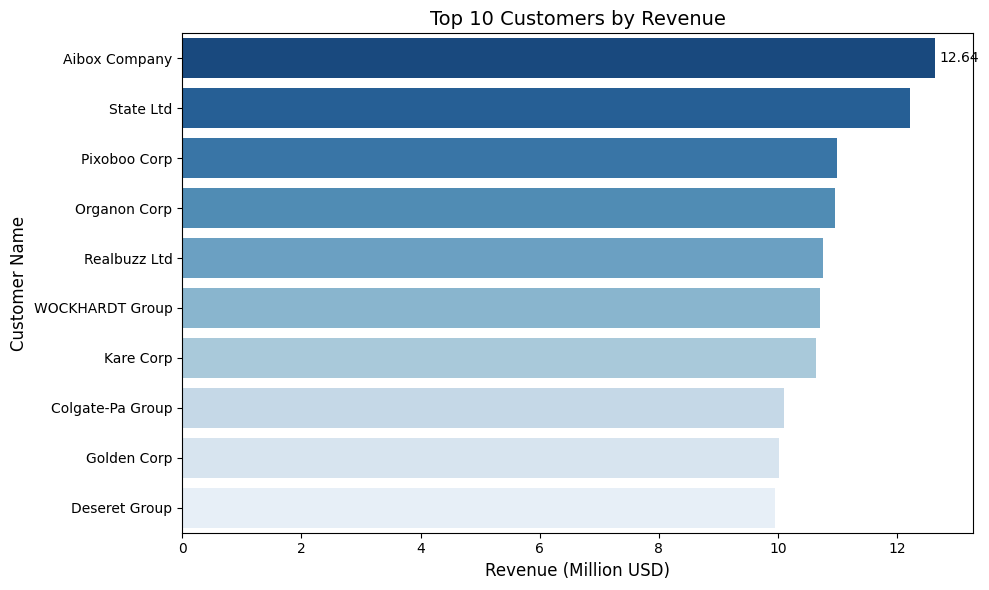

In [ ]:
# Top 10 Customers by Revenue

# 🔹 Step 1: Group by customer and sum revenue
top_rev = (
    df.groupby('customer_name')['revenue']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

# 🔹 Step 2: Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=top_rev.values / 1e6,  # Convert to millions
    y=top_rev.index,
    palette='Blues_r'        # Darker for highest
)

# 🔹 Step 3: Add labels and formatting
ax.bar_label(ax.containers[0], fmt='%.2f', padding=3)  # Add value labels on bars

plt.title('Top 10 Customers by Revenue', fontsize=14)
plt.xlabel('Revenue (Million USD)', fontsize=12)
plt.ylabel('Customer Name', fontsize=12)
plt.tight_layout()
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14456\275886035.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


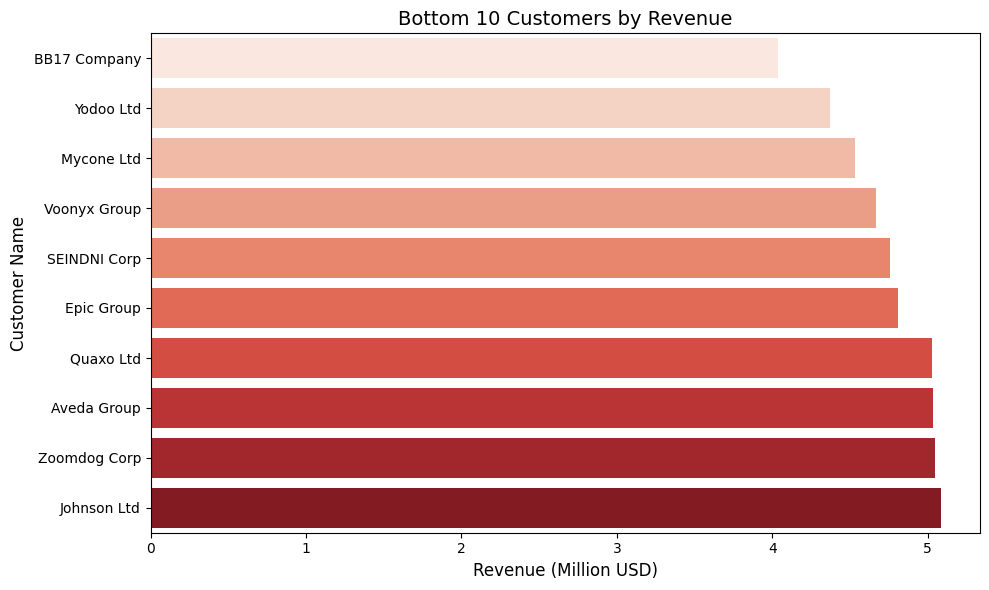

In [ ]:
# Bottom 10 Customers by Revenue

# 🔻 Step 1: Group by customer and get bottom 10 by revenue
bottom_rev = (
    df.groupby('customer_name')['revenue']
      .sum()
      .sort_values(ascending=True)
      .head(10)
)

# 🔻 Step 2: Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=bottom_rev.values / 1e6,  # Convert to millions
    y=bottom_rev.index,
    palette='Reds'              # Darkest for highest in this bottom group
)

# 🔻 Step 3: Add labels and formatting


plt.title('Bottom 10 Customers by Revenue', fontsize=14)
plt.xlabel('Revenue (Million USD)', fontsize=12)
plt.ylabel('Customer Name', fontsize=12)
plt.tight_layout()
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14456\4252958056.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


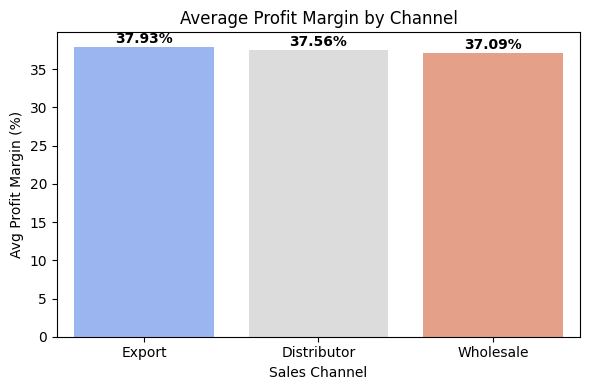

In [130]:
# Compute average profit margin percentage for each channel

channel_margin = (
    df.groupby('channel')['profit_margin_pct']  # Group by sales channel
      .mean()                                  # Calculate mean profit margin %
      .sort_values(ascending=False)            # Sort channels from highest to lowest margin
)

# Set the figure size for clarity
plt.figure(figsize=(6, 4))

#  Plot a bar chart of average profit margin by channel
ax = sns.barplot(
    x=channel_margin.index,    # X-axis: channel names
    y=channel_margin.values,   # Y-axis: average profit margin values
    palette='coolwarm'         # Color palette for bars
)

#  Add chart title and axis labels
plt.title('Average Profit Margin by Channel')  # Main title
plt.xlabel('Sales Channel')                    # X-axis label
plt.ylabel('Avg Profit Margin (%)')             # Y-axis label

# Annotate each bar with its exact margin percentage
for i, v in enumerate(channel_margin.values):
    ax.text(
        i,                  # X position (bar index)
        v + 0.5,            # Y position (bar height + small offset)
        f"{v:.2f}%",        # Text label showing percentage with two decimals
        ha='center',        # Center-align the text horizontally
        fontweight='bold'   # Bold font for readability
    )

# Adjust layout to prevent clipping and display the plot
plt.tight_layout()
plt.show()



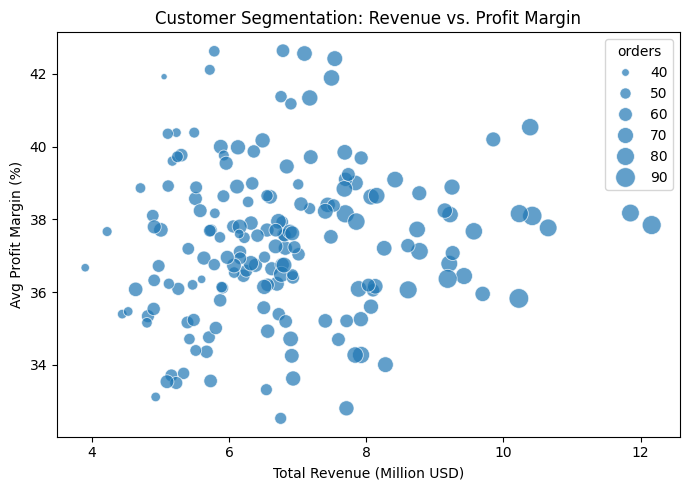

In [ ]:
# Aggregate metrics per customer

cust_summary = df_new.groupby('customer_name').agg(
    total_revenue=('revenue', 'sum'),
    total_profit=('profit', 'sum'),
    avg_margin=('profit_margin_pct', 'mean'),
    orders=('order_number', 'nunique')
)

# Convert revenue to millions
cust_summary['total_revenue_m'] = cust_summary['total_revenue'] / 1e6

plt.figure(figsize=(7, 5))

# Bubble chart with revenue in millions
sns.scatterplot(
    data=cust_summary,
    x='total_revenue_m',        # <-- use revenue in millions
    y='avg_margin',
    size='orders',
    sizes=(20, 200),
    alpha=0.7
)

plt.title('Customer Segmentation: Revenue vs. Profit Margin')
plt.xlabel('Total Revenue (Million USD)')  # <-- updated label
plt.ylabel('Avg Profit Margin (%)')

plt.tight_layout()
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14456\1472159427.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['profit_margin_pct'] = (df_new['profit'] / df_new['revenue']) * 100


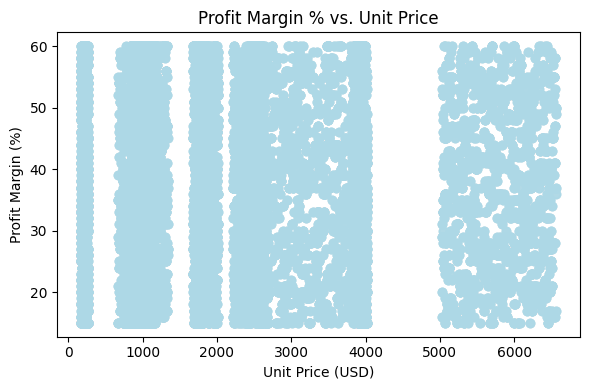

In [118]:
# Profit Margin % vs. Unit Price

# Make sure 'profit_margin_pct' exists
df_new['profit_margin_pct'] = (df_new['profit'] / df_new['revenue']) * 100

plt.figure(figsize=(6, 4))
plt.scatter(df_new['unit_price'], df_new['profit_margin_pct'], color='lightblue', alpha=0.5)
plt.title('Profit Margin % vs. Unit Price')
plt.xlabel('Unit Price (USD)')
plt.ylabel('Profit Margin (%)')
plt.tight_layout()
plt.show()


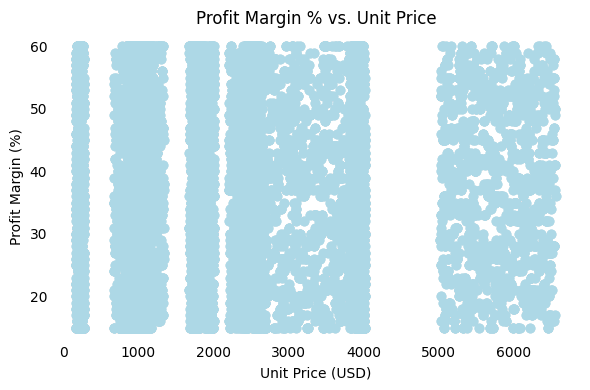

In [119]:
# import matplotlib.pyplot as plt

# Calculate profit margin percentage
df['profit_margin_pct'] = (df['profit'] / df['revenue']) * 100

# Create scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(
    df['unit_price'],
    df['profit_margin_pct'],
    color='lightblue',
    alpha=0.5
)

# Title and axis labels
plt.title('Profit Margin % vs. Unit Price')
plt.xlabel('Unit Price (USD)')
plt.ylabel('Profit Margin (%)')

# Remove all axis lines (spines)
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(False)

# Remove axis lines (tick lines)
ax.tick_params(axis='both', length=0)  # Hides the little lines

# Show only tick labels (values)
plt.grid(False)  # No grid
plt.tight_layout()
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14456\230308216.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


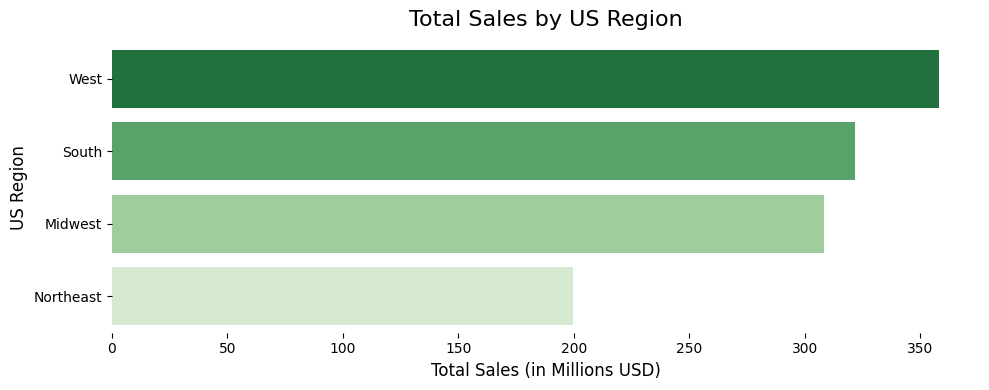

In [ ]:
# Total Sales by Region

# 1. Aggregate total sales by region (in millions)
region_sales = (
    df_new
    .groupby('region')['revenue']
    .sum()
    .sort_values(ascending=False)  # so bars go top→bottom
    / 1e6                         # convert to millions
)

# 2. Plot
plt.figure(figsize=(10, 4))
sns.barplot(
    x=region_sales.values,
    y=region_sales.index,
    palette='Greens_r'          # dark→light green
)

# 3. Formatting
plt.title('Total Sales by Region', fontsize=16, pad=12)
plt.xlabel('Total Sales (in Millions USD)', fontsize=12)
plt.ylabel('US Region', fontsize=12)
plt.xticks(rotation=0)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14456\2815583896.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


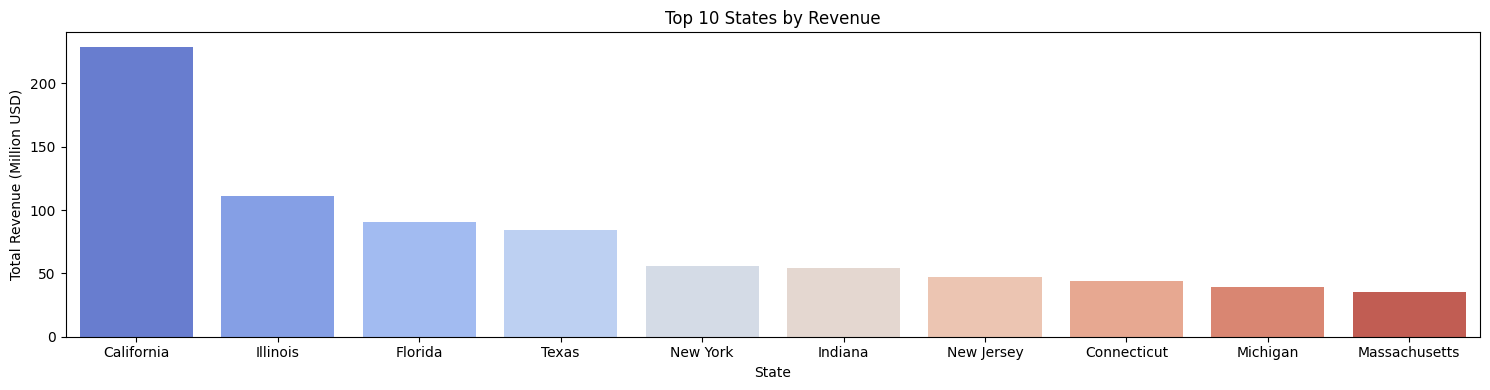

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14456\2815583896.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


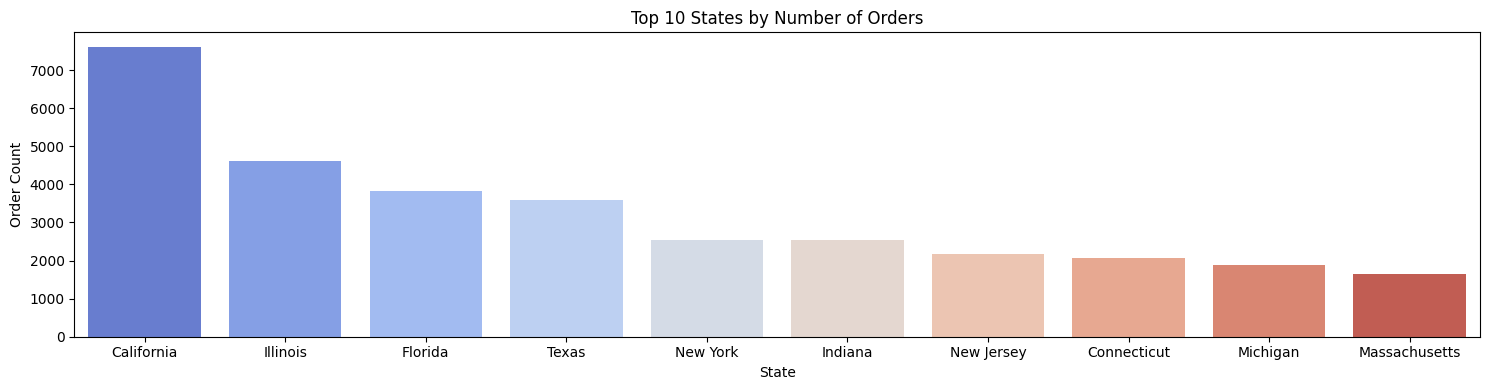

In [ ]:
# Aggregate total revenue and unique order count per state

state_rev = df.groupby('state_name').agg(
    revenue=('revenue', 'sum'),          # Sum up revenue per state
    orders=('order_number', 'nunique')   # Count unique orders per state
).sort_values('revenue', ascending=False).head(10)  # Keep top 10 by revenue

# Plot 1: Top 10 states by revenue (scaled to millions)
plt.figure(figsize=(15, 4))
sns.barplot(
    x=state_rev.index,                   # X-axis: state names
    y=state_rev['revenue'] / 1e6,        # Y-axis: revenue in millions
    palette='coolwarm'                   # Color palette
)
plt.title('Top 10 States by Revenue')     # Chart title
plt.xlabel('State')                       # X-axis label
plt.ylabel('Total Revenue (Million USD)') # Y-axis label
plt.tight_layout()                        # Adjust layout
plt.show()                                # Display the plot

# Plot 2: Top 10 states by number of orders
plt.figure(figsize=(15, 4))
sns.barplot(
    x=state_rev.index,                   # X-axis: state names
    y=state_rev['orders'],               # Y-axis: order counts
    palette='coolwarm'                   # Color palette
)
plt.title('Top 10 States by Number of Orders')  # Chart title
plt.xlabel('State')                              # X-axis label
plt.ylabel('Order Count')                        # Y-axis label
plt.tight_layout()                               # Adjust layout
plt.show()             

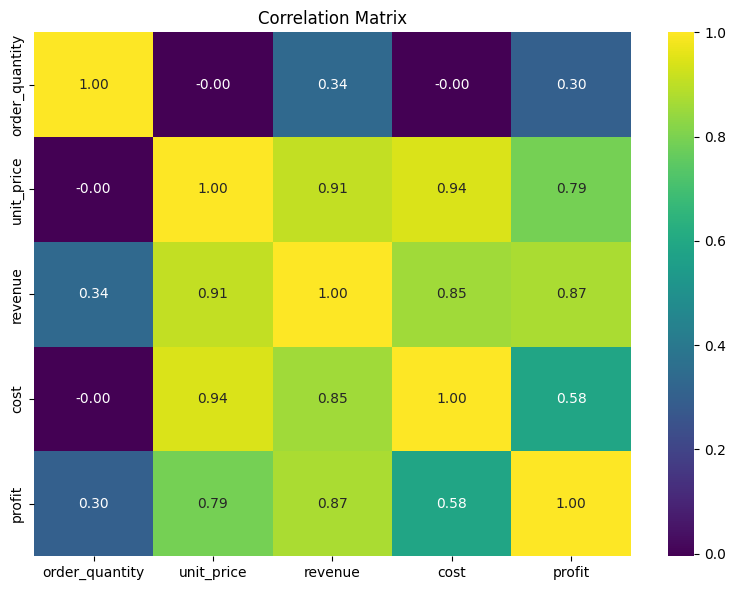

In [ ]:
# Correlation Heatmap 

# List numeric columns to include in the correlation calculation
num_cols = ['order_quantity', 'unit_price', 'revenue', 'cost', 'profit']

# Calculate the correlation matrix for these numeric features
corr = df_new[num_cols].corr()

# Set the figure size for clarity
plt.figure(figsize=(8,6))

# Plot the heatmap with annotations and a viridis colormap
sns.heatmap(
    corr,           # Data: correlation matrix
    annot=True,     # Display the correlation coefficients on the heatmap
    fmt=".2f",      # Format numbers to two decimal places
    cmap='viridis'  # Color palette for the heatmap
)

# Add title for context
plt.title('Correlation Matrix')

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the heatmap
plt.show()
     

In [145]:
df

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,cost,state,...,state_name,region,lat,lon,budget,total_cost,profit,profit_margin_pct,order_month,year_month
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,...,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0,2014-01,2014-01
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,...,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0,2014-01,2014-01
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,...,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0,2014-01,2014-01
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,...,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0,2014-01,2014-01
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,...,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0,2014-01,2014-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,Dazzlesphe Corp,Wholesale,Product 26,12,1815.7,21788.4,980.478,PA,...,Pennsylvania,Northeast,40.15511,-74.82877,NaN,11765.736,10022.664,46.0,2018-02,2018-02
64100,SO - 0007706,2018-02-28,Yombu Corp,Export,Product 21,6,864.3,5185.8,579.081,IL,...,Illinois,Midwest,42.11030,-88.03424,NaN,3474.486,1711.314,33.0,2018-02,2018-02
64101,SO - 0007718,2018-02-28,Bath Group,Distributor,Product 13,11,3953.0,43483.0,2648.510,FL,...,Florida,South,26.24453,-80.20644,NaN,29133.610,14349.390,33.0,2018-02,2018-02
64102,SO - 0008084,2018-02-28,Linklinks Ltd,Distributor,Product 20,7,3959.7,27717.9,2930.178,NY,...,New York,Northeast,42.91002,-78.74182,NaN,20511.246,7206.654,26.0,2018-02,2018-02


In [147]:
# Export Final DataFrame to CSV

df.to_csv('Sales_data(EDA Exported).csv', index=False)